In [2]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.04s). [brian2.stateupdaters.base.method_choice]


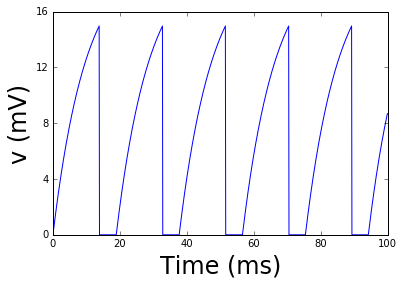

In [5]:
# This is just section 1 from paper - constant I(t) + refractoriness
start_scope()
N = 1 # number of neurons
tau_m = 10 * ms # membrane time constant
v_r = 0 * mV # reset potential
v_th = 15 * mV # threshold potential
I_c = 20 * mV # constant input current



eqs = '''
dv/dt = -(v-I)/tau_m : volt (unless refractory)
I : volt
'''

lif = NeuronGroup(N, model=eqs, threshold='v>v_th', reset='v=v_r', refractory=5*ms)

lif.v = v_r
lif.I = I_c

spikes = SpikeMonitor(lif)
v_trace = StateMonitor(lif, 'v', record=True)


run(0.1*second)
figure(1)
plot(v_trace.t/ms,v_trace.v[0]/mV)
xlabel('Time (ms)', fontsize=24)
ylabel('v (mV)',fontsize=24)
yticks([0,4,8,12,16])
show()
# plot the f-I curve for a LIF neuron with constant input

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'linear' (took 0.09s). [brian2.stateupdaters.base.method_choice]


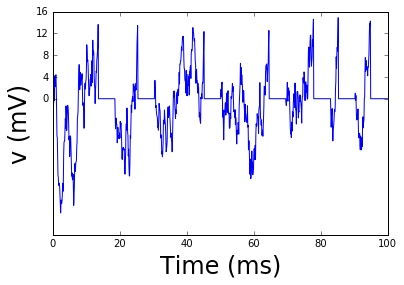

In [4]:
# This is just section 2 - random I(t)
# Not fully functioning right now.
start_scope()
N = 1 # number of neurons
tau_m = 10 * ms # membrane time constant
v_r = 0 * mV # reset potential
v_th = 15 * mV # threshold potential
I_c = 20 * mV # constant input current

stimulus = TimedArray(np.random.rand(int(runtime/defaultclock.dt)))

eqs = '''
dv/dt = -(v-stimulus(t))/tau_m : volt (unless refractory)
'''

lif = NeuronGroup(N, model=eqs, threshold='v>v_th', reset='v=v_r', refractory=5*ms)

lif.v = v_r

spikes = SpikeMonitor(lif)
v_trace = StateMonitor(lif, 'v', record=True)


run(0.1*second)
figure(1)
plot(v_trace.t/ms,v_trace.v[0]/mV)
xlabel('Time (ms)', fontsize=24)
ylabel('v (mV)',fontsize=24)
yticks([0,4,8,12,16])
show()
# plot the f-I curve for a LIF neuron with constant input

In [21]:
# me trying to generate f-I graph for diff values of I and failing
# - Noah
data = []
for i in range(0,100):
    start_scope()
    G = NeuronGroup(N, model=eqs, threshold='v>v_th', reset='v=v_r')
    statemon = StateMonitor(G, 'v', record=0)
    spikemon = SpikeMonitor(G)
    
    G.v = v_r
    G.I = I_c * i/99
    
    run(100*ms)
    data.append([i, np.mean(spikemon.t[:]/second)])

INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for g